## Course Information
INFO 521: Introduction to Machine Learning\
Instructor: Xuan Lu, College of Information Science

## Instructions
#### Objectives
This worksheet will assess your knowledge of basic commands in Python. Please review the lectures, suggested readings, and additional resources before starting the homework, as this document closely follows the provided materials.

#### Grading
Please note that grades are **NOT exclusively based on your final answers**. We will be grading the overall structure and logic of your code. Feel free to use as many lines as you need to answer each of the questions. I also highly recommend and strongly encourage adding comments (`#`) to your code. Comments will certainly improve the reproducibility and readability of your submission. Commenting your code is also good coding practice. **Specifically for the course, you’ll get better feedback if the TA is able to understand your code in detail.**

__Total score__: 120 points, with 20 points for Questions 1-3 and 100 points for the brief independent project.

#### Submission
This homework is due by the end of October 16th (**Wednesday, 11:59 pm AZ time**). Please contact the instructor if you are (i) having issues opening the assignment, (ii) not understanding the questions, or (iii) having issues submitting your assignment. Note that late submissions are subject to a penalty (see late work policies in the syllabus).
- Please submit a single Jupyter Notebook file (this file). Answers to each question should be included in the relevant block of code (see below). Rename your file to "**lastname_Hw7.ipynb**" before submitting. <font color='red'>A broken file won’t be graded, so please ensure that your file is accessible.</font> If a given block of code is causing issues and you didn't manage to fix it, please add comments.

#### Time commitment
Please reach out if you’re taking more than ~18h to complete (1) this homework, (2) reading the book chapters, and (3) going over the lectures. I will be happy to provide accommodations if necessary. **Do not wait until the last minute to start working on this homework**. In most cases, working under pressure will certainly increase the time needed to answer each of these questions and the instructor and the TA might not be 100% available on Sundays to troubleshoot with you.

#### Looking for help?
First, please go over the relevant readings for this week. Second, if you’re still struggling with any of the questions, do some independent research (e.g. stackoverflow is a wonderful resource). Don’t forget that your classmates will also be working on the same questions - reach out for help (check under the Discussion forum for folks looking to interact with other students in this class or start your own thread). Finally, the TA is available to answer any questions during office hours and via email.

## Questions
#### Author:
Name: [Gayathri Renganathan]\
Affiliation: [MS in Data Science - iSchool]

### Conceptual

#### Question 1

Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1$, $R_2$, ... , the cutpoints $t_1$ , $t_2$, ..., and so forth. Please insert your sketch below and make sure the sketch file is attached to your submission.

 > **_Answer:_**  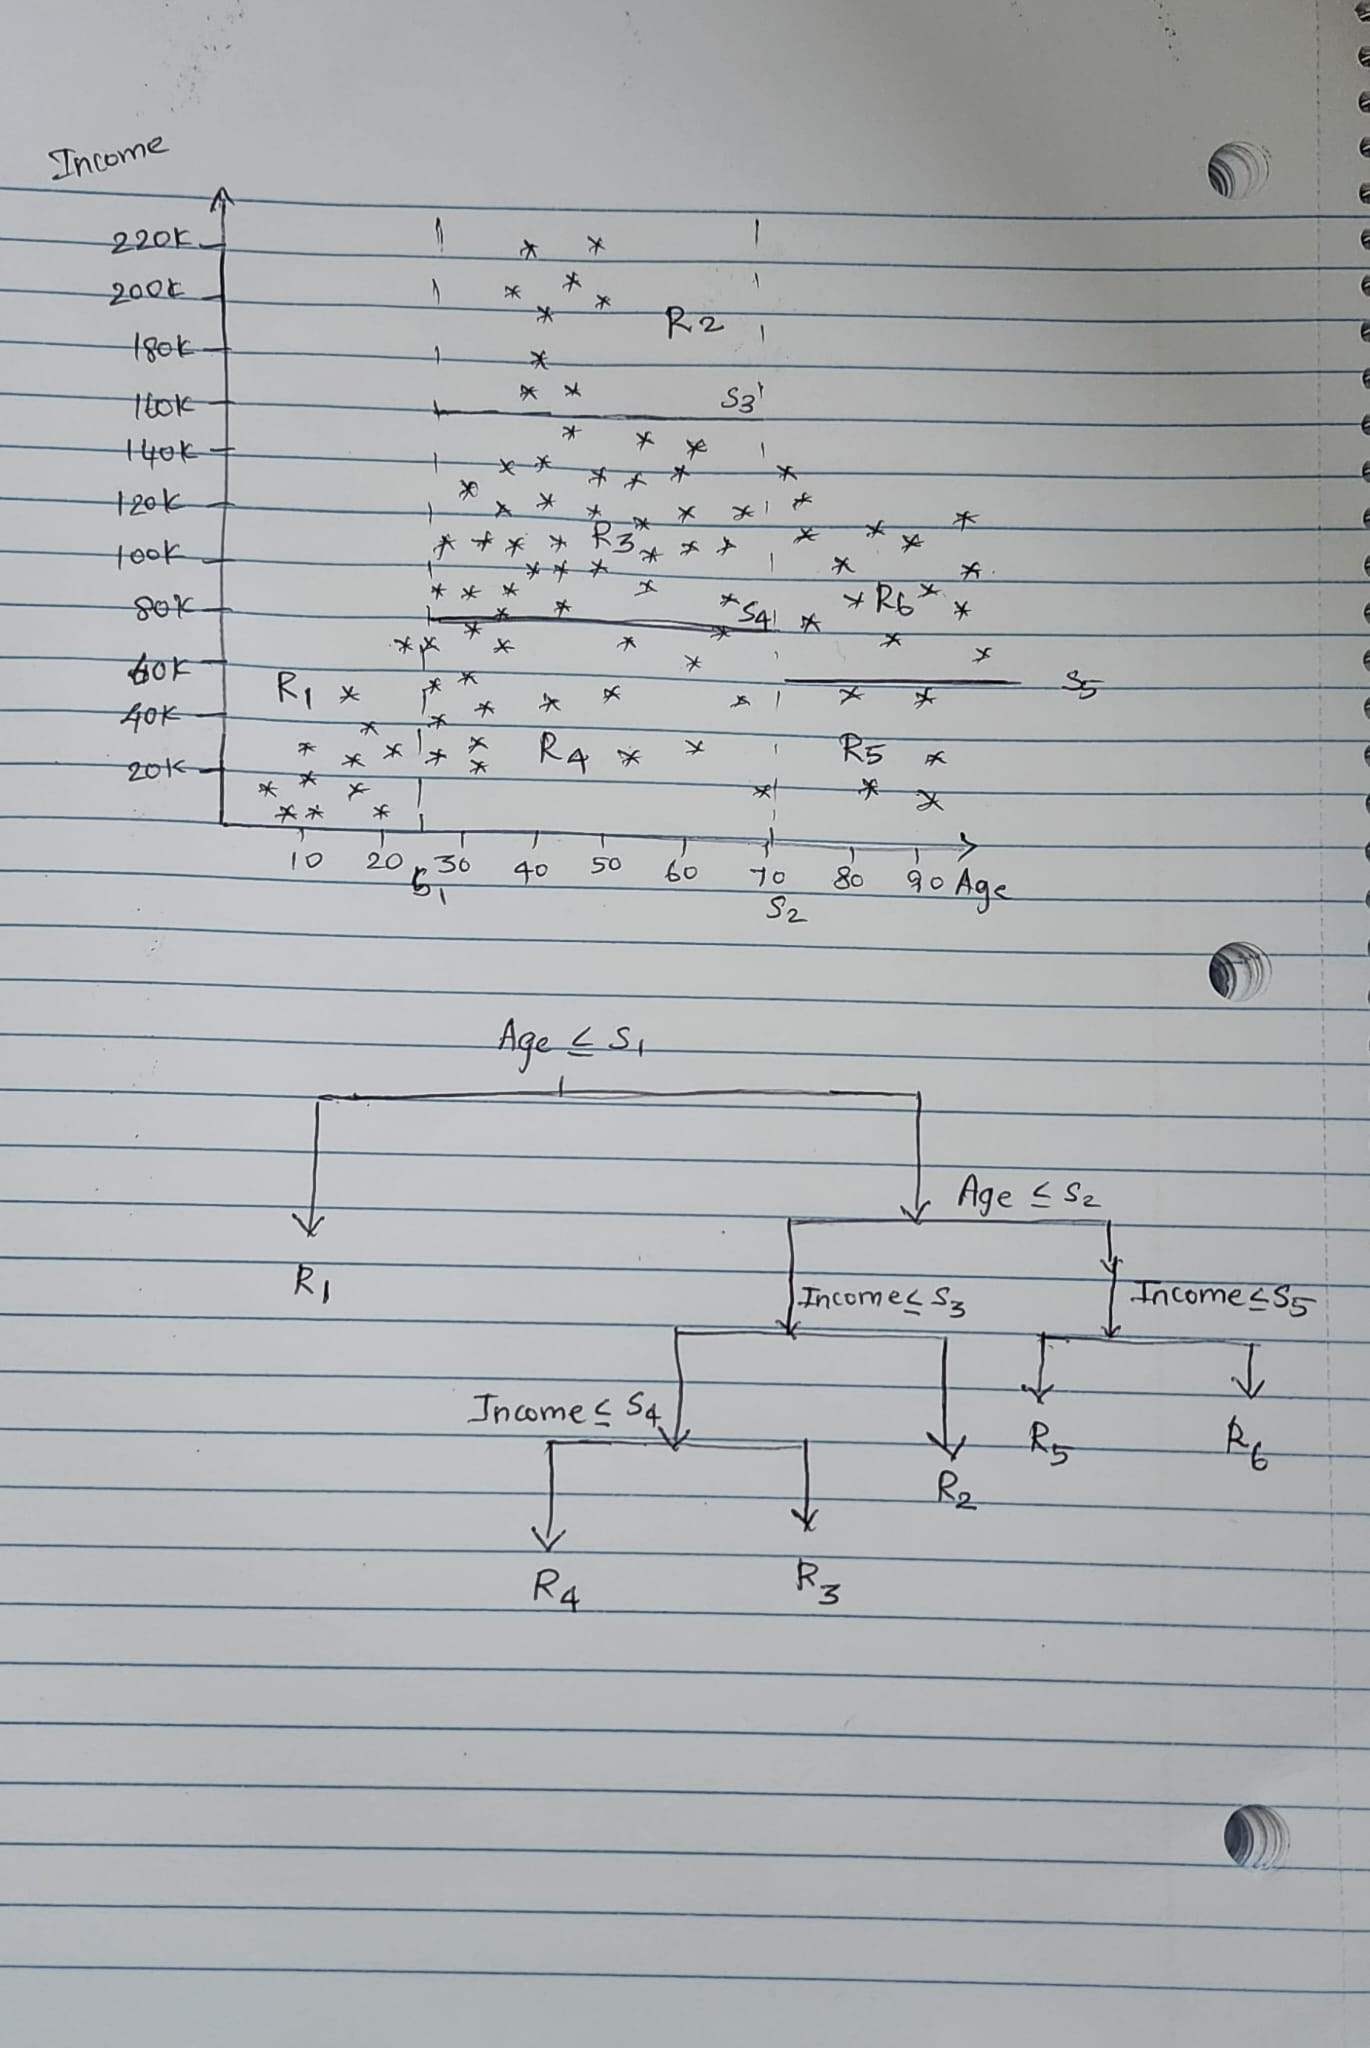

#### Question 2 (421/521)

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(Class is Red|X)$:

$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, and $0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this week's lecture and readings. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

  > **_Answer:_**
> $P(Class is Red|X)$ = [$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, $0.75$]
> 
> Using the majority approach
> 1. Using 0.5 as threshold to classify these classes
> 2. Samples with probability < 0.5(threshold) will be classified as Green
>
>     $P(Class is Red|X)$  <  0.5 : [0.1, 0.15, 0.2, 0.2]
>
>     *4* samples will be classified Green
> 4. Samples with probability > 0.5(threshold) will be classified as Red
> 
>    $P(Class is Red|X)$  >  0.5 : [ 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]
>
>    *6* samples will be classified Red
> 5. Now pick the majority class between the both
>    
>     So the final classification is **Red** as it is majority vote

>Using Average Probabilty
>1. Take the avg of all the probability
>
>     Avg = (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75 )/10 = 0.45
>2. Classify the average probability based on threshold - 0.5
>
>     Avg = 0.45 < 0.5 - Will be classified as Green
>
>     So, the final classification is **Green** using the average approach

In [1]:
#Importing the libraries
import pandas as pd
from ISLP import load_data
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn import metrics

## Applied

#### Question 3

Apply boosting and random forest to a data set of your choice. Feel free to use any of the datasets in the `ISLP` python package (e.g. `College`) to examine any of the questions that were discussed in any of the previous homeworks. See https://intro-stat-learning.github.io/ISLP/data.html for `ISLP` datasets. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods (e.g. linear or logistic regression models)? Which of these approaches yields the best performance?

In [2]:
# BEGIN SOLUTION
# Reading the Auto dataset
Auto = load_data('Auto')
Auto.head()
# END SOLUTION

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
#One hot encoding for the categorical variable
Auto = pd.get_dummies(data = Auto, columns=['origin'], drop_first=True, dtype = int)

# Remove missing data if any
print("Check for missing data in Auto Dataset \n", Auto.isna().sum())

#Split the dataset into train and test
X = Auto.drop(['mpg'], axis=1)
Y = Auto['mpg']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5, random_state=1)

Check for missing data in Auto Dataset 
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin_2        0
origin_3        0
dtype: int64


In [4]:
#Fitting the linear Regression Model
lr = LinearRegression()
lr.fit(xtrain, ytrain)

#Evaluate training accuracy
print(" Training Accuracy using Linear Regression Model", lr.score(xtrain,ytrain))
#Evaluate test accuracy
print(" Test Accuracy using Linear Regression Model", lr.score(xtest,ytest))
print(" MSE using Linear Regression Model", mean_squared_error(ytest,lr.predict(xtest)))

 Training Accuracy using Linear Regression Model 0.8280250384960957
 Test Accuracy using Linear Regression Model 0.8058822376780799
 MSE using Linear Regression Model 12.57539270477565


In [5]:
#Fitting Random forest 
rf_model = RandomForestRegressor(n_estimators=50, random_state=0)

# Fit the regressor with x and y data
rf_model.fit(xtrain, ytrain)

#Evaluate training accuracy
print(" Training Accuracy using Random Forest Model", rf_model.score(xtrain,ytrain))
#Evaluate test accuracy
print(" Test Accuracy using Random Forest Model", rf_model.score(xtest,ytest))
print(" MSE using Random Forest Model", mean_squared_error(ytest,rf_model.predict(xtest)))

 Training Accuracy using Random Forest Model 0.9824180197469033
 Test Accuracy using Random Forest Model 0.8450267798806912
 MSE using Random Forest Model 10.039519714285717


In [6]:
#Fitting XGBoost Model
gb_model = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                random_state = 0,
                                    max_depth = 5)

# Fit the regressor with x and y data
gb_model.fit(xtrain, ytrain)

#Evaluate training accuracy
print(" Training Accuracy using Gradient Boosting Model", gb_model.score(xtrain,ytrain))
#Evaluate test accuracy
print(" Test Accuracy using Gradient Boosting Model", gb_model.score(xtest,ytest))
print(" MSE using Gradient Boosting Model", mean_squared_error(ytest,gb_model.predict(xtest)))

 Training Accuracy using Gradient Boosting Model 0.9857172357726979
 Test Accuracy using Gradient Boosting Model 0.8511920165629165
 MSE using Gradient Boosting Model 9.6401215784866


> **Answer:**
> 1. Gradient Boosting Model perform better comparing to Linear Regression and Random Forest.
> 2. Both Random forest and Gradient Boosting Algorithm works better than Linear Regression model.
> 3. There is a slight improvement in Mean Squared Error(MSE) when evaluating the model with Gradient Boosting Regressor Model. 

## Brief independent project

In this part of the assignment, you will be provided with two options of basic ML code used to examine a given question. __Assume that this code was sent to you by a collaborator who is asking for your help in improving their ML workflow.__ 

1. Critically examine the steps outlined by your collaborator (e.g. data pre-processing, model development) with the goal of improving the performance of the model given the specific research question. 
2. Reconsider and re-evaluate their data pre-processing steps.
3. Generate an alternative model. Your alternative model can be of the same class as the baseline model (but not necessarily).
4. Finally, you will compare your new model to the one suggested by your collaborator. If your model does not outperform your collaborator's model, briefly examine why this was the case.

__Please justify your decisions.__ For instance, explain why you decided to plot Y vs X and not Y vs Z; why 20% of observations in the F feature were inputted using mean values; why model N was selected and not M; or even why model performance is solely examined based on accuracy. 

__I’m looking for systematic and well-justified decisions.__ I am interested in reading thoughtful discussions on the potential practical consequences of your decisions. Hint: Assume that you’re explaining this to your collaborator. __Please be brief and focus on your major decisions__. Your grade will be based on your ability to explain your choices and not the length of your submission. Please do not forget to annotate your code.

Your submission (also part of this file; see below) should include only the following sections (also below under __Report__):

##### Synopsis
A brief (<300 words) description of the dataset, goals of the analysis, methods used, main results, and conclusions.

##### Data pre-processing
Steps related to missing data, reduction of dimensionality, training and test data splits, center, scale, creating dummy variables, etc.

##### Data exploration
Correlation analyses, scatterplots, class imbalance, etc.

##### Model development
This component should include descriptions on why a given model was used, how each of the examined models was designed (e.g. are you using all the features in the dataset?), tuning (if needed), and model evaluation. 

##### Conclusions
Frame your conclusions in two different ways (<300 words). First, conclude on the question that is being addressed in your selected project. Second, compare the performance of your approach in relation to your collaborator's model. 


Choose one of the two options below. 

In [7]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

__Option 1__. Your collaborator is interested in implementing a new model to classify patients into sick or not sick categories. _They are particularly concerned with the number of times their model fails to correctly classify truly sick patients._ Feel free to use any of the variables in the dataset, reconsider the data pre-processing approach, explore other models, data partitions, etc.

In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

Data1Raw = pd.read_csv('sick.data', sep = '\t')
Data1 = Data1Raw.drop(columns=['TBG', 'TBG_measured', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']).dropna()
Data1['Class'] = Data1['Class'].map({'sick': 1, 'negative': 0})

binary_cols = Data1.columns[Data1.isin(['f', 't']).all()]
Data1[binary_cols] = Data1[binary_cols].map(lambda x: 1 if x == 't' else 0)
Data1['sex'] = Data1['sex'].map({'F': 0, 'M': 1})
Data1 = pd.get_dummies(Data1, columns=['referral_source'], dtype='int')

X = Data1.drop(columns=['Class'])
y = Data1['Class']
X = sm.add_constant(X)
glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

y_pred = glm_results.predict(X)
y_pred_class = [1 if p > 0.5 else 0 for p in y_pred]
conf_matrix = confusion_matrix(y, y_pred_class)
print(conf_matrix)

[[3396    0]
 [ 225    0]]


C:\Users\yeshw\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


__Option 2__. Your collaborator is generating a model to predict the duration of flight delays (`dep_delay`+`arr_delay` in the `flights` dataset). _They will be only convinced that your model is better if you are able to reduce uncertainty around predictions for a novel observation (`newObs`)._ Feel free to use any of the variables in the dataset, reconsider the data pre-processing approach, explore other models, data partitions, etc.
Hint: Consider the trade-offs associated with the overall model error and prediction error for a particular observation. Consider explaining this to your collaborator.

In [9]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

flights = pd.read_csv("flights.data", sep = '\t')
flights['delay'] = flights['dep_delay'] + flights['arr_delay']
flights = flights.loc[flights.delay.notna()]

new_obs = flights.sample(n=1,random_state=5)

flights_train, flights_test = train_test_split(flights, test_size=0.25, random_state=5)
X_train = sm.add_constant(flights_train['distance'])
y_train = flights_train['delay']
de_model = sm.OLS(y_train, X_train).fit()

X_new_obs = sm.add_constant(new_obs[['distance']], has_constant='add')
pred = de_model.get_prediction(X_new_obs)
pred_summary = pred.summary_frame(alpha=0.05)
print(pred_summary)

            mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
10252  21.808186  0.202569      21.411155      22.205217   -140.122523   

       obs_ci_upper  
10252    183.738894  


In [10]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

Data1Raw = pd.read_csv('sick.data', sep = '\t')
Data1 = Data1Raw.drop(columns=['TBG', 'TBG_measured', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']).dropna()
Data1['Class'] = Data1['Class'].map({'sick': 1, 'negative': 0})

binary_cols = Data1.columns[Data1.isin(['f', 't']).all()]
Data1[binary_cols] = Data1[binary_cols].map(lambda x: 1 if x == 't' else 0)
Data1['sex'] = Data1['sex'].map({'F': 0, 'M': 1})
Data1 = pd.get_dummies(Data1, columns=['referral_source'], dtype='int')

X = Data1.drop(columns=['Class'])
y = Data1['Class']
X = sm.add_constant(X)
glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

y_pred = glm_results.predict(X)
y_pred_class = [1 if p > 0.5 else 0 for p in y_pred]
conf_matrix = confusion_matrix(y, y_pred_class)
print(conf_matrix)

[[3396    0]
 [ 225    0]]


C:\Users\yeshw\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [11]:
Data1['Class'].value_counts()

Class
0    3396
1     225
Name: count, dtype: int64

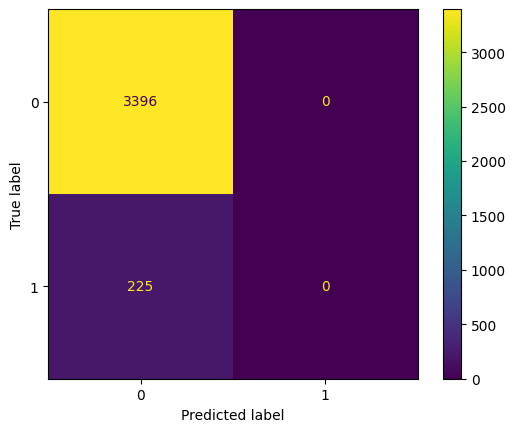

In [12]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["0","1"])
cm_display.plot()
plt.show()

### Report

##### Synopsis

  > **_Answer:_** The Dataset is about analysing patients for the two most common types of thyroid condition (Hypothyroid and Hyperthyroid). The dataset has various features about the patient like age, sex, pregnancy, and various lab result for thyroid conditions like T3, TT4, T4U, FTI. These features can be used to predict if the patient is affected with thyroid or not. The dataset has data for patients affected with thyroid disease and also for healthy patients.
> 
>The goal of the project is to predict the patients affected with thyroid disease as correctly as possible. The project is a binary classification problem as the target variable takes two values – yes (for patients affected with thyroid) and no (for healthy patients). The dataset provided is not a clean dataset. Several measures like handling missing data, encoding categorical variable, handling the data imbalance and scaling the dataset are performed before proceeding with modelling for better results in performance. 
>
>The dataset is imbalanced, it has very less data for the thyroid patients. As the goal is more focused on correctly predicting the thyroid patients. We are not interested in the overall accuracy of the model as it considers predicting both the thyroid patients and healthy patients. If the model correctly predicts all the healthy patients, the model accuracy will be very high. But we are interested in the prediction of thyroid patients correctly. So, the goal is to improve the recall score of predicting thyroid patients in performance metrics. 
>
>Next, the dataset is split into training and testing dataset to train the model and evaluate the performance in test dataset. The dataset is trained on different models like Logistic Regression, Random Forest classifier. The final model is built on one of them based on the model which provides good performance metrics (Recall score) result.


##### Data pre-processing

In [13]:
# BEGIN SOLUTION
#Reading the dataset
sick_data = pd.read_csv('sick.data', sep = '\t')

#Printing the dataset shape and first 5 records
print("Dataset shape", sick_data.shape)
print(sick_data.head())
# END SOLUTION

Dataset shape (3772, 30)
    age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
1  41.0   F            f                  f                         f    f   
2  23.0   F            f                  f                         f    f   
3  46.0   M            f                  f                         f    f   
4  70.0   F            t                  f                         f    f   
5  70.0   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... TT4_measured  \
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   
5        f               f              f                 f  ...            t   

     TT4 T4U_measur

**Encoding categorical data**

In [14]:
#Handling categorical Data
Data1 = sick_data.copy()
# One hot encoding of categorical variables for model prediction.
Data1['Class'] = Data1['Class'].map({'sick': 1, 'negative': 0})
Data1['sex'] = Data1['sex'].map({'F': 0, 'M': 1})
Data1 = pd.get_dummies(Data1, columns=['referral_source'], dtype='int', drop_first=True)

# Converting all the binary encoded columns values from `t` and `f` to `1` and `0`
binary_cols = Data1.columns[Data1.isin(['f', 't']).all()]
Data1[binary_cols] = Data1[binary_cols].map(lambda x: 1 if x == 't' else 0)
Data1.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,TBG,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
1,41.0,0.0,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,NaN,0,1,0,0,0
2,23.0,0.0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,0,0,0,1
3,46.0,1.0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,NaN,0,0,0,0,1
4,70.0,0.0,1,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,0,0,0,1
5,70.0,0.0,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,NaN,0,0,0,1,0


In [15]:
# Removing the duplicate Records in the dataset
duplicates = Data1.duplicated()

# Display duplicate rows
print("Number of duplicate records in the dataset",duplicates.sum())

# Removing the duplicate records
Data1.drop_duplicates(inplace=True)

# Dataset count after dropping
print("Dataset shape", Data1.shape)

Number of duplicate records in the dataset 61
Dataset shape (3711, 33)


**Handling missing data**

In [16]:
# checking for missing values
print("Missing Data in the Dataset\n",Data1.isna().sum())

Missing Data in the Dataset
 age                             1
sex                           149
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           309
T3_measured                     0
T3                            709
TT4_measured                    0
TT4                           171
T4U_measured                    0
T4U                           327
FTI_measured                    0
FTI                           325
TBG_measured                    0
TBG                          3711
Class              

In [17]:
Data1[['age', 'T3','TT4','T4U','FTI','TSH']].describe()

,age,T3,TT4,T4U,FTI,TSH
count,3710.000000,3002.000000,3540.000000,3384.000000,3386.000000,3402.000000
mean,51.860377,2.013504,108.328475,0.994989,110.480715,5.087820
std,20.123585,0.827572,35.605132,0.195485,33.088316,24.524998
min,1.000000,0.050000,2.000000,0.250000,2.000000,0.005000
25%,36.000000,1.600000,88.000000,0.880000,93.000000,0.500000
50%,54.000000,2.000000,103.000000,0.980000,107.000000,1.400000
75%,67.000000,2.400000,124.000000,1.080000,124.000000,2.700000
max,455.000000,10.600000,430.000000,2.320000,395.000000,530.000000


In [18]:
# There is one person with age > 100 , which is ideally not possible
print("Number of patients with age > 100",Data1[Data1['age'] > 100])

# Replacing age = 455 with NAN
Data1.age = Data1.age.replace(455, np.nan)

# Missing Data in After updating age column
print("Number of patients with missing age", Data1['age'].isna().sum())

Number of patients with age > 100         age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
1365  455.0  0.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
1365     0         0                0               0                  0  ...   

       T4U  FTI_measured    FTI  TBG_measured  TBG  Class  \
1365  1.13             1  104.0             0  NaN      0   

      referral_source_SVHC  referral_source_SVHD  referral_source_SVI  \
1365                     0                     0                    1   

      referral_source_other  
1365                      0  

[1 rows x 33 columns]
Number of patients with missing age 2


In [19]:
# _measured column indicate whether the particular test was taken or not
# 1 in Measured column means Test taken, so a value will be recorded in the corresponding test
# 0 in Measured column means Test not taken, so it will NAN in the corresponding test

print(all(np.array(Data1['TBG_measured'] == 0.0) == np.array(Data1.TBG.isna())))
print(all(np.array(Data1['TSH_measured'] == 0.0) == np.array(Data1.TSH.isna())))
print(all(np.array(Data1['T3_measured'] == 0.0) == np.array(Data1.T3.isna())))
print(all(np.array(Data1['TT4_measured'] == 0.0) == np.array(Data1.TT4.isna())))
print(all(np.array(Data1['T4U_measured'] == 0.0) == np.array(Data1.T4U.isna())))
print(all(np.array(Data1['FTI_measured'] == 0.0) == np.array(Data1.FTI.isna())))


True
True
True
True
True
True


In [20]:
# Dropping `TBG` and `TBG_measured` column as all the values are missing for `TBG`
Data1 = Data1.drop(columns=['TBG','TBG_measured'])

The dataset has several missing data in lab result variables (T3, TT4, T4U, TSH, TBG, FTI). Technically these values are missing as the patients did not take any of these lab tests. This is indicated by corresponding ‘_measured’ variables (T3_measured, TT4_measured, T4U_measured, TSH_measured, TBG_measured , FTI_measured) which determines whether the patient took the test or not. Imputing a mean or median value will not be appropriate as the distorts the actual meaning for that variable. So, we are using Iterative imputer by observing the closer patients to better estimate the values for these lab values. 

In [21]:
# So NAN in 'TSH', 'T3', 'TT4', 'T4U', 'FTI' columns does not mean missing value, it indicates that the patient didnot take the test.
# Here, we cannot use Mean Imputation, as it is fill in the average value for the column
# We can use Iterative imputation to better approximate with the closest patient , This method consider all the other features to predict what the missing value should be.

#Setting the min_value to 0, to avoid negative values in the imputation
imp = IterativeImputer(max_iter=10, random_state = 70, min_value = 0)

#Creating a copy of the dataset before imputing
data1_copy = Data1.copy()
imp = pd.DataFrame(imp.fit_transform(data1_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
data1_copy.age = imp.age.values
data1_copy.TSH = imp.TSH.values
data1_copy.T3 = imp.T3.values
data1_copy.TT4 = imp.TT4.values
data1_copy.T4U = imp.T4U.values
data1_copy.FTI = imp.FTI.values

C:\Users\yeshw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


For ‘Sex’ variable, there are 149 records with missing values. Here we are using a simple Imputer to impute to impute with most frequent sex value.   

In [22]:
# There is more data which is missing in Sex column
print("value counts in Sex column\n", data1_copy['sex'].value_counts())

# Understanding the sex distribution in the target class
print("sex distribution in the target class \n",data1_copy.groupby("sex").Class.value_counts(normalize = True))

#Creating imputer for sex
# Since the sex distribution is same across the target class, we can use a Simple Imputer to fill in the missing sex values
simple_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sex_imp = pd.DataFrame(simple_imp.fit_transform(data1_copy.loc[:, ['sex']]), columns=['sex'])
data1_copy.sex = sex_imp.sex.values

value counts in Sex column
 sex
0.0    2424
1.0    1138
Name: count, dtype: int64
sex distribution in the target class 
 sex  Class
0.0  0        0.943894
     1        0.056106
1.0  0        0.921793
     1        0.078207
Name: proportion, dtype: float64


In [23]:
data1_copy.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
Class                        0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

**Splitting the dataset for training and testing**

In [24]:

y = np.array(data1_copy['Class'])
X = data1_copy.drop(['Class'],axis=1)

# Splitting the data for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state=123)

**Scaling the dataset**
> Below code is to standardize the feature column data to bring them to the same scale.
>
> `Age`column is the range 1-100, `T3` column is  in the range 0-10, while `TT4` column is in the range of 2 -400 and so are the other column
>
> If the model is directly trained on the unscaled data, it might give more weightage to the features with high values. So, it is important to bring all the features in one scale before fitting the model
> 

In [25]:
 
# Standardize features to get all the features to a standard scale

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Oversampling**
> As the dataset is highly imbalanced, i.e., patients with thyroid disease has very less records compared to patients without thyroid disease. So, the model can very well estimate the relationship of the patients without thyroid disease.
>
> But, our main goal is to identify the patients with thyroid disease. So, we are randomly oversampling the dataset, so that both patients with & without thyroid is equally represented.
>
> We will first train all the model using the given dataset. Then, we will fit the best model on the oversampled dataset and see if there is a performance improvement

In [26]:
# Oversampling the training dataset
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
y_resampled

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

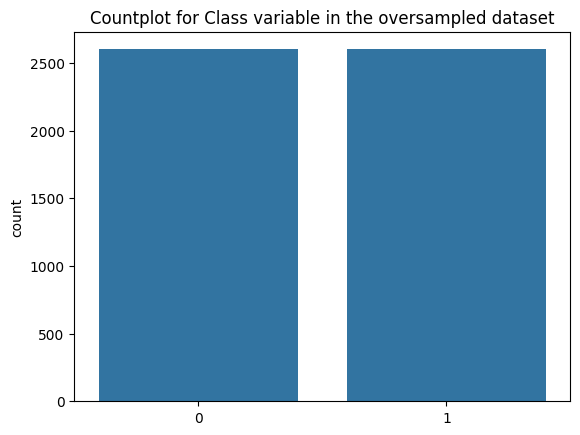

In [27]:
# BEGIN SOLUTION
#Plot the target variable distribution in the oversampled dataset
sns.countplot(x=y_resampled)
plt.title("Countplot for Class variable in the oversampled dataset");
# END SOLUTION

##### Data exploration

In [28]:
Data1.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
Class                          int64
r

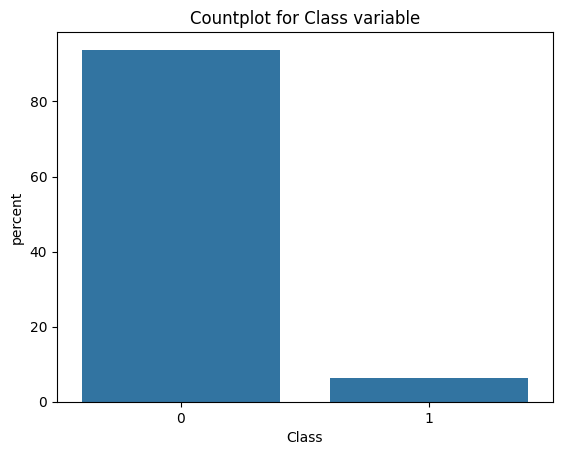

In [29]:
# BEGIN SOLUTION
#Plot the target variable distribution
sns.countplot(x='Class',data=data1_copy, stat='percent')
plt.title("Countplot for Class variable");
# END SOLUTION

> The dataset is unbalanced. Most of the data in the dataset corresponds to the `Patients without thyroid'. Patients with thyroid is under-represented in the dataset.

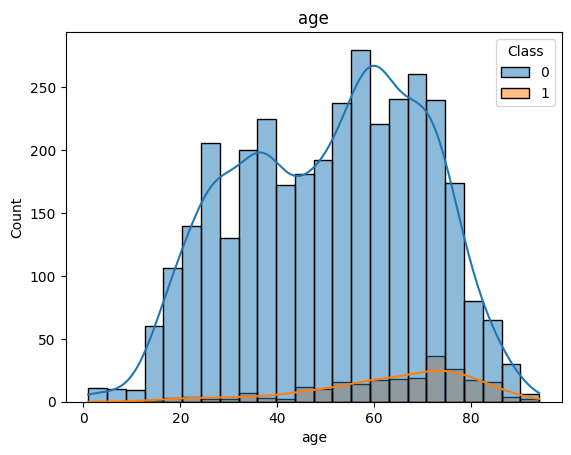

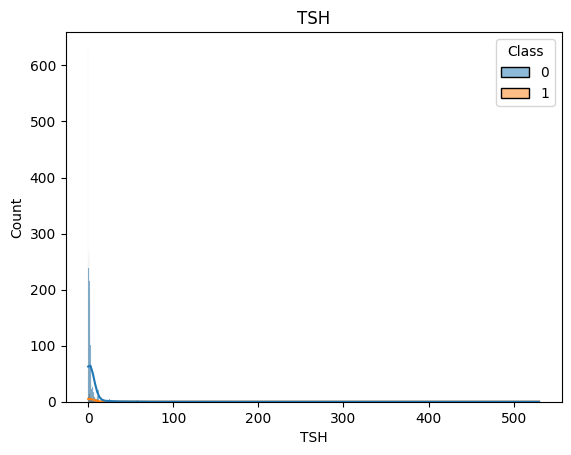

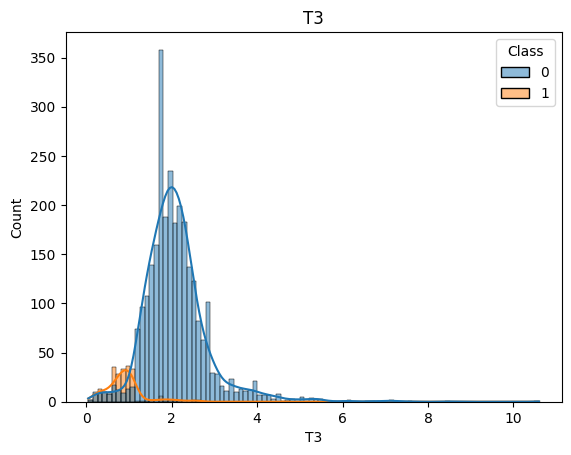

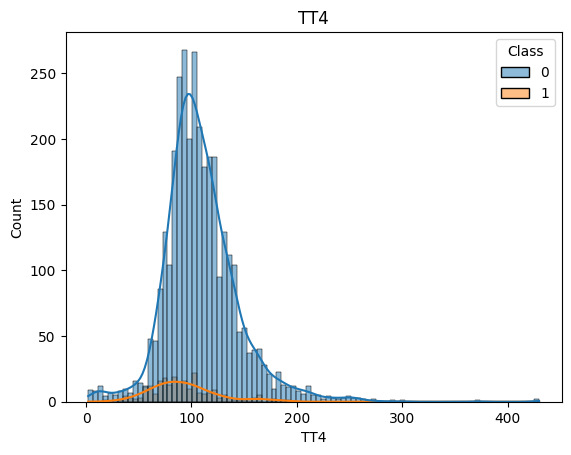

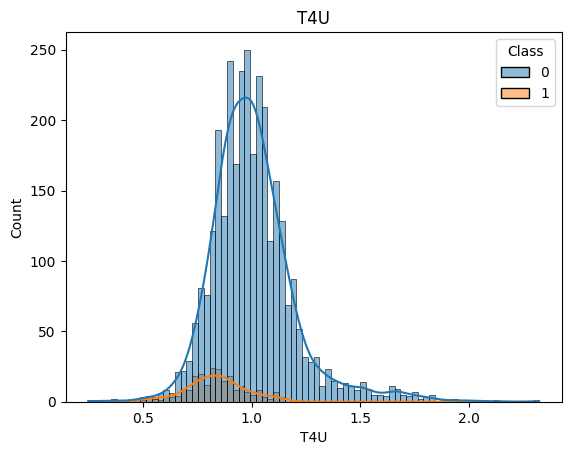

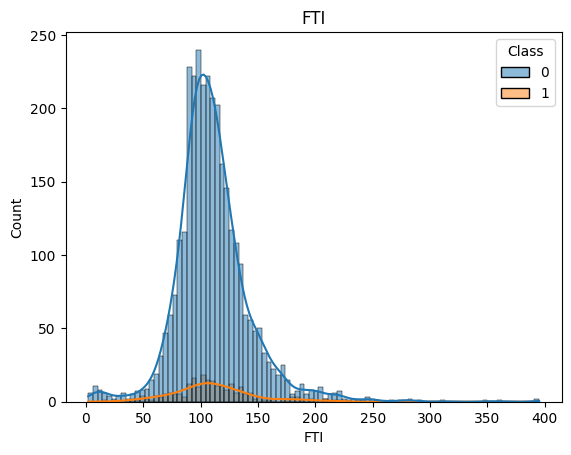

In [30]:
#Plotting the histogram of below numeric columns
numeric_cols = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI' ]
for col in numeric_cols:
    col_plot = sns.histplot(Data1, x=col, hue='Class', kde=True)
    col_plot.set_title(col)
    plt.show()

> From the histogram plot of the numerical features, though there is not a significance clear evidence of which features contribute to the thyroid patients, there are a few inference we can make from the plot.
> 1. In the age feature,we can see patients mostly above age 50 are common to get affected.
> 2. T3, TT4 and T4U feature shows different value range for thyroid patients compared to non-thyroid patients. These features could be somewhat potiential indicator for classification.
> 3. For example, the value range of T4U for thyroid patients is more around 0.5 - 1.25. While the non-thyroid patients has the range of 0.25 - 2.5 

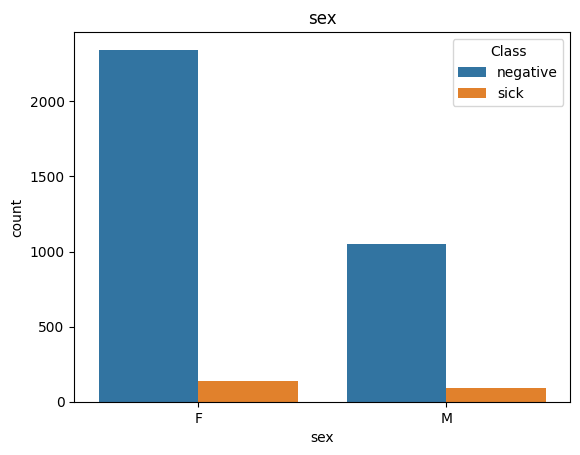

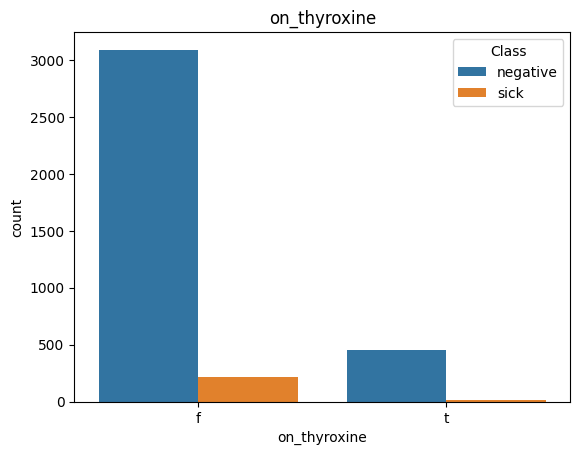

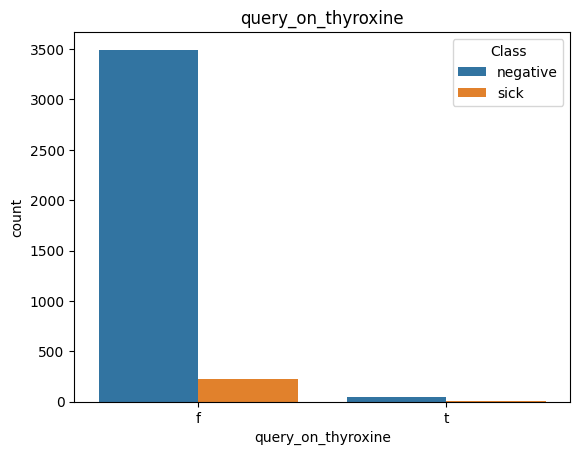

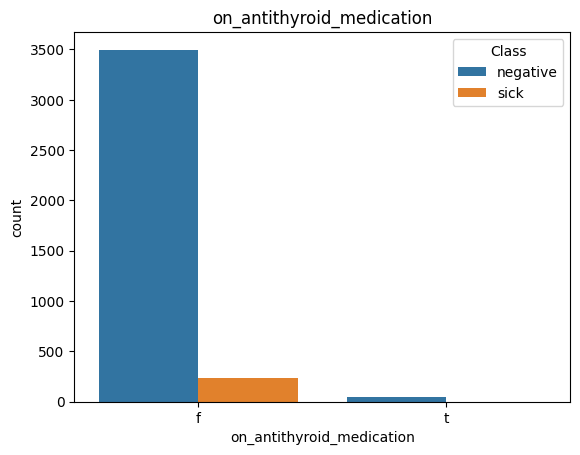

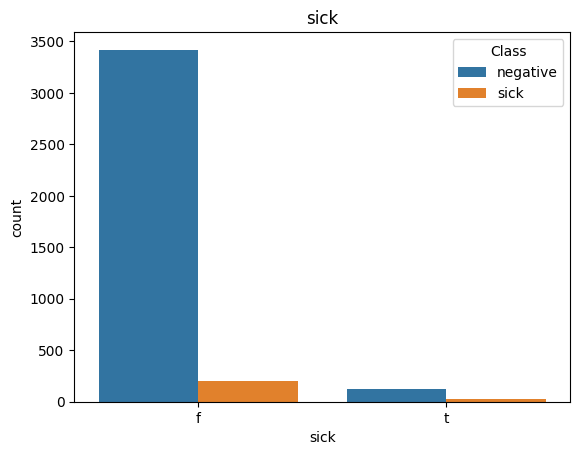

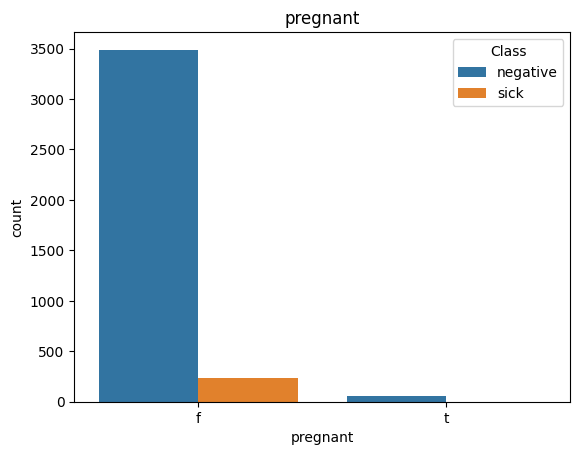

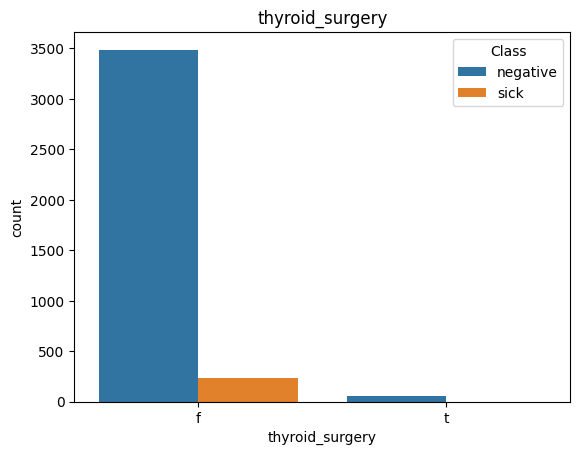

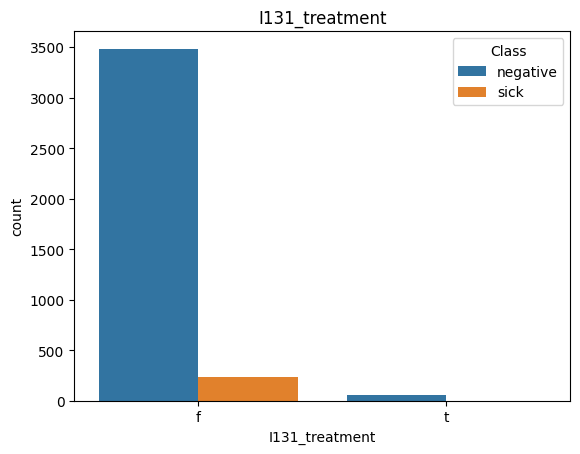

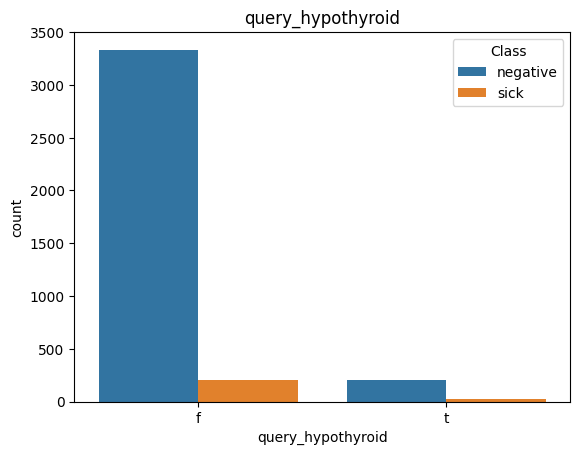

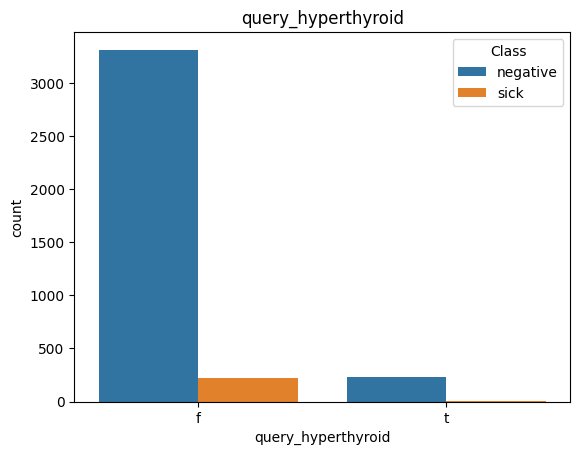

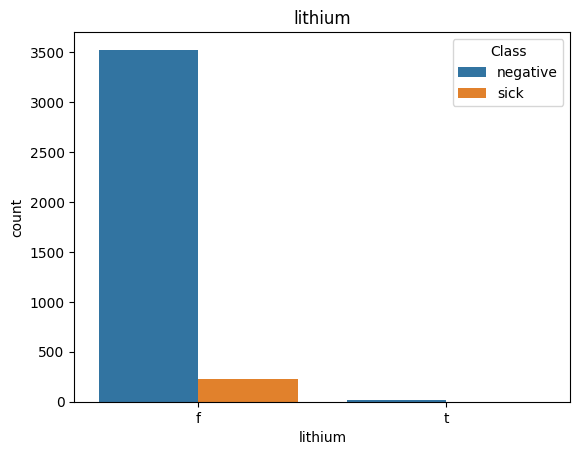

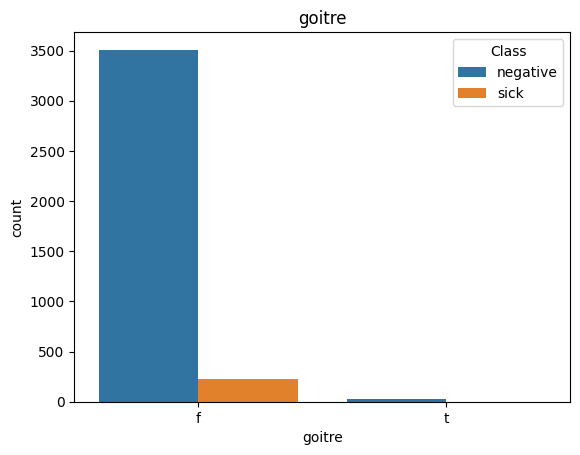

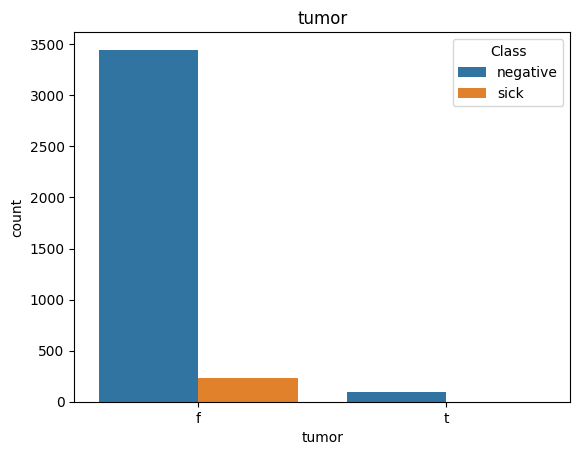

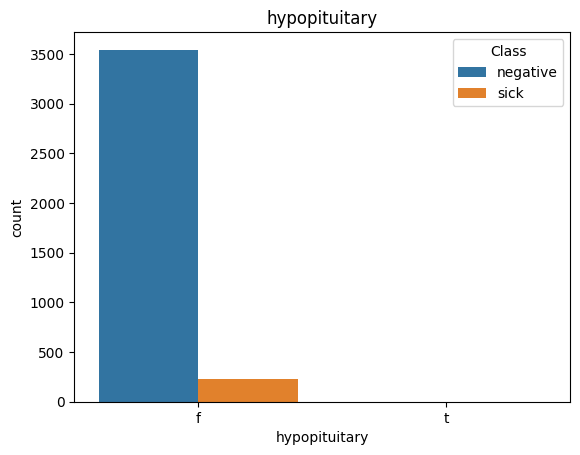

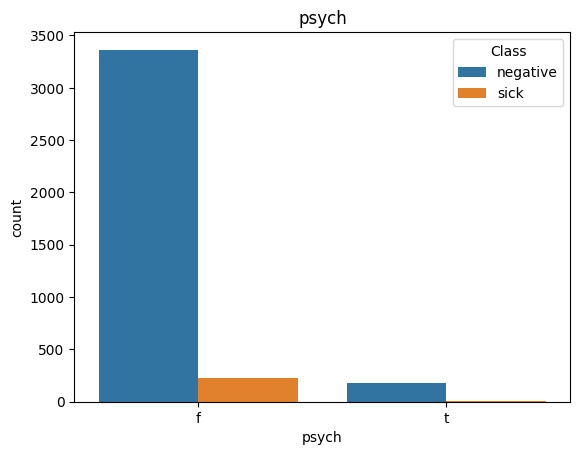

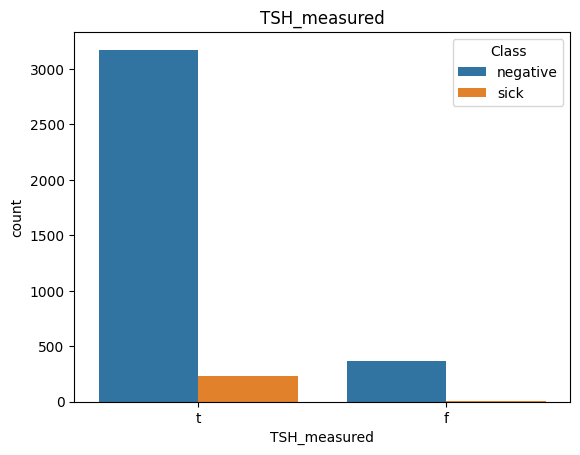

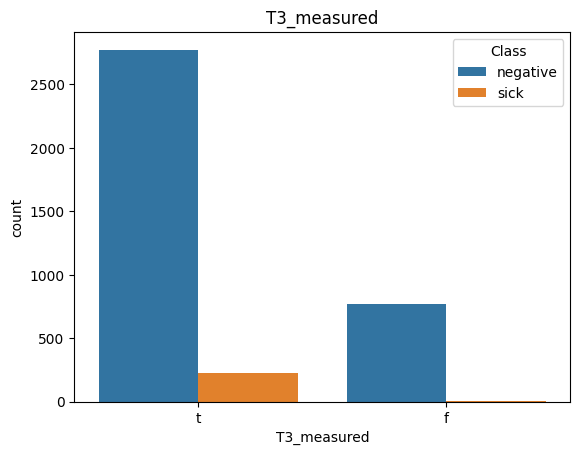

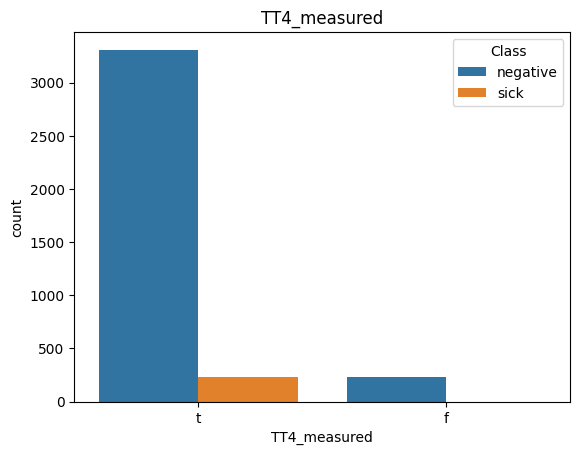

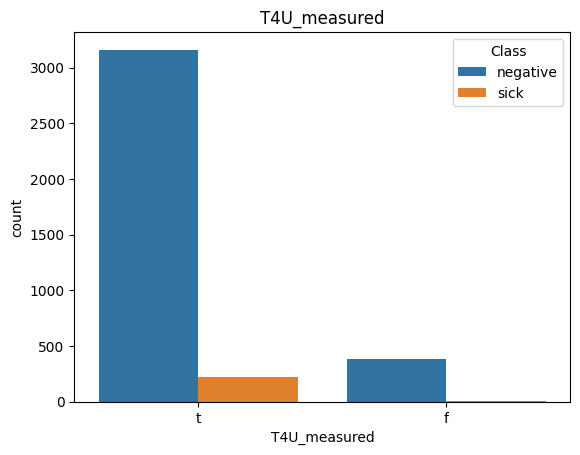

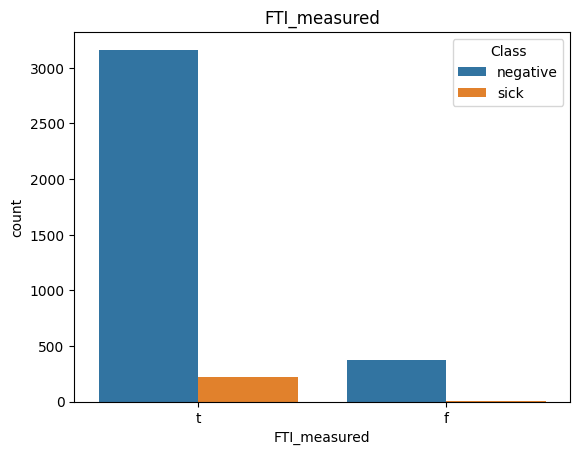

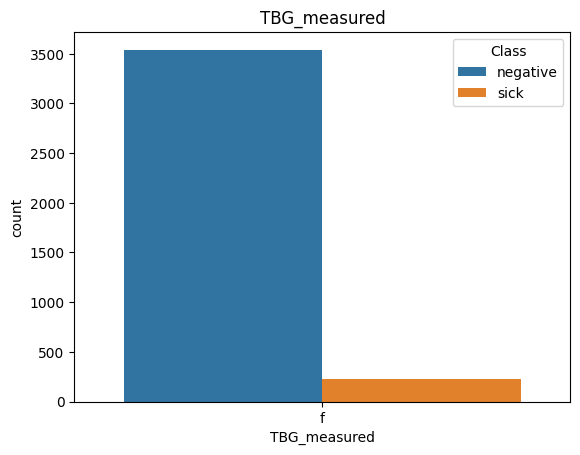

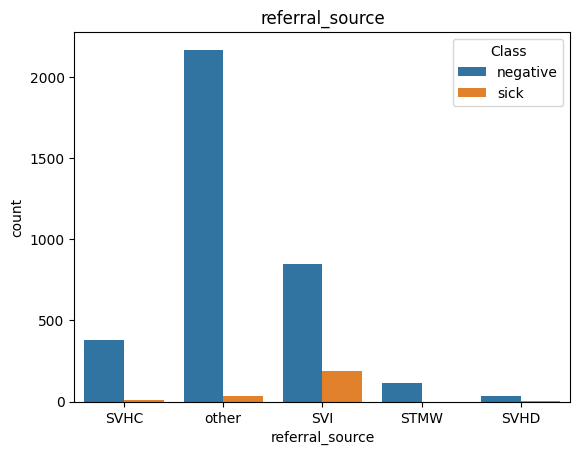

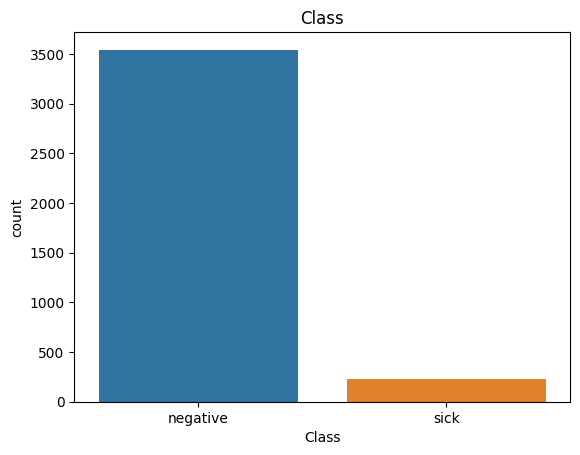

In [31]:
# Plotting the countplot of categorical variable 
object_cols = sick_data.select_dtypes(include='object').columns
for col in object_cols:
    col_plot = sns.countplot(sick_data, x=col, hue='Class')
    col_plot.set_title(col)
    plt.show()

> People with Thyroid disease is highly underreprensented across all the features.
>  1. Patients in **SVI** referral source, have more thyroid patients compared to other referral sources.
>  2. Patients who were not prescribed for T3, TT4, T4U, FTI, TSH labs is shown by T3_measured, TT4_measured,  T4U_measured, FTI_measured, TSH_measured = `f`. Most of the patients who were not prescribed for this test didnot have thryoid disease. Maybe, the doctors prescribed these tests based on the patient's symptoms. Even for the patients who took these test, most of them didnot have thyroid disease.


<Axes: >

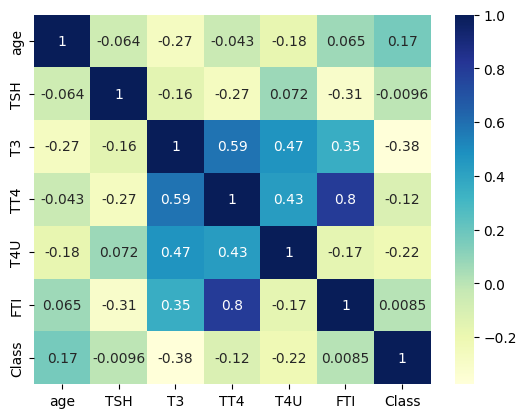

In [32]:
#Correlation plot for the dataset

# Plotting the heat map of the numerical features against the target `Class` variable
numeric_cols.append('Class')
data1_copy[numeric_cols].corr()
sns.heatmap(data1_copy[numeric_cols].corr(), cmap="YlGnBu", annot=True)


> As we saw earlier in the previous plot, none of the features correlate significantly with the target `Class` variable. T3, TT4, T4U features has a slight correlation with `Class` variable
>
> Also, we can see a good correlation of TT4 and FTI feature

##### Model development

In [33]:
#Classification Report Generation 
# Utility method which generates the classification report of the model and prints the confusion matrix and the Roc-AUC score
# ROC-AUC score indicates the model performance 
def generate_classification_report(name, model, y_pred):
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    print("***Roc Auc Score for the model ***", roc_auc_score(y_test, y_pred))
    print("----------------------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    print("----------------------------------------------------------")
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = ["0","1"])
    cm_display.plot()
    plt.show()

> We are trying to first fit a simple model like Logistic Regression which can be used for Binary classification problem. As the logistic Regression is less complex, it may be able to understand the relationship of the data properly and generalise well. The model is trained on the entire dataset which resulted after model cleaning which removed columns like TBG, TBG_measured. The collabarator has removed some of the features like T3, TT4, T4U, FTI. But, I think these features are very important as it indicates the lab values which can give potential indication for thyroid disease. So, we are going all variables.

 Training Accuracy using Logistic Regression Model 0.9680201221703199
 Test Accuracy using Logistic Regression Model 0.96875
Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       880
           1       0.77      0.56      0.65        48

    accuracy                           0.97       928
   macro avg       0.87      0.78      0.82       928
weighted avg       0.97      0.97      0.97       928

----------------------------------------------------------
***Roc Auc Score for the model *** 0.7767045454545455
----------------------------------------------------------
[[872   8]
 [ 21  27]]
----------------------------------------------------------


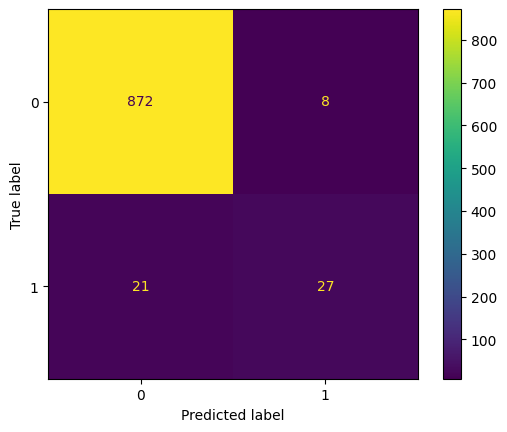

In [34]:
# BEGIN SOLUTION
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

#Evaluate training accuracy
print(" Training Accuracy using Logistic Regression Model", logistic_model.score(X_train,y_train))
#Evaluate test accuracy
print(" Test Accuracy using Logistic Regression Model", logistic_model.score(X_test,y_test))

y_pred = logistic_model.predict(X_test)
#Print classification report
generate_classification_report( "Logistic Regression",logistic_model, y_pred)
# END SOLUTION

> The model still performs poorly in predicting the thyroid patients. The Recall score is 0.56 which is better than the collaborator model.
> But, we can try to improve the model performance by slightly adjusting the prediction threshold.
> 
> By default, model predicts by keeping a threshold of 0.5. So, it predicts by using a cut-off on the prediction probability. Example if the prediction probability is 0.45 , then the patient will be considered healthy. If the prediction probability is 0.55 , then the patient will be considered thyroid affected patients. We can see if model performance improves by adjusting the threshold value to 0.3

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       880
           1       0.63      0.75      0.69        48

    accuracy                           0.96       928
   macro avg       0.81      0.86      0.83       928
weighted avg       0.97      0.96      0.97       928

----------------------------------------------------------
***Roc Auc Score for the model *** 0.8630681818181817
----------------------------------------------------------
[[859  21]
 [ 12  36]]
----------------------------------------------------------


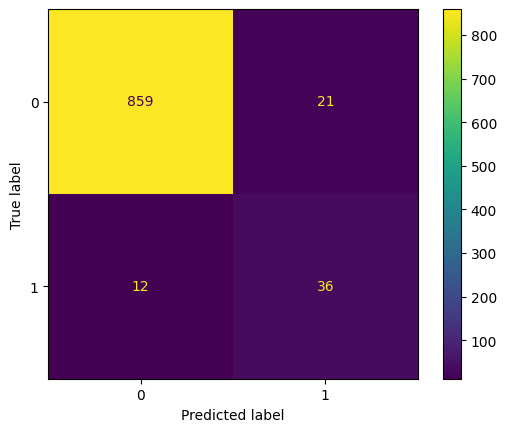

In [35]:
# Tuning the threshold parameter to improve the model performace on the recall
y_pred_prob = logistic_model.predict_proba(X_test)
y_pred = y_pred_prob[:, 1] >= 0.3
#Print classification report
generate_classification_report( "Logistic Regression",logistic_model, y_pred)

> Performance metrics especially Recall, F1 score and ROC-AUC score improved by adjusting the threshold. But it predicts many healthy patients as thyroid patients which helped in improving the Recall score for the thyroid patients

> Now, we are considering a more complex model like Randomforest classifier which is based on many simple decision tree. The model is fit on the entire dataset which resulted after data cleaning.

 Training Accuracy using Randomforest Model 1.0
 Test Accuracy using Randomforest Model 0.990301724137931
Classification Report for Randomforest
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       880
           1       0.98      0.83      0.90        48

    accuracy                           0.99       928
   macro avg       0.98      0.92      0.95       928
weighted avg       0.99      0.99      0.99       928

----------------------------------------------------------
***Roc Auc Score for the model *** 0.916098484848485
----------------------------------------------------------
[[879   1]
 [  8  40]]
----------------------------------------------------------


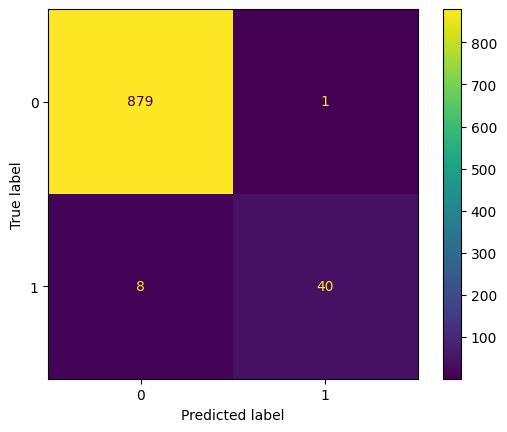

In [36]:

# Fitting Randomforest Classifier with default parameters
rf_def_model = RandomForestClassifier() 
rf_def_model.fit(X_train, y_train) 
  
# predict the model on the test data 
y_pred = rf_def_model.predict(X_test) 
  
#Evaluate training accuracy
print(" Training Accuracy using Randomforest Model", rf_def_model.score(X_train,y_train))
#Evaluate test accuracy
print(" Test Accuracy using Randomforest Model", rf_def_model.score(X_test,y_test))

#Print classification report
generate_classification_report( "Randomforest",rf_def_model, y_pred)

> Performance metrics improved with Randomforest classifier in both precision and Recall score. The precision has improved greatly, but there is a little improvement in the Recall score.
>
>  Now, we are fine tuning the Random forest model by searching for the best estimator through GridSearchCV and then use the model estimators to predict the dataset again. As the below code takes longer time to run, I am commenting it.

In [37]:
#Parameter tuning to find the best model
# Commenting it out as it takes longer time to run
'''
# parameters to search in the GridSearch
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 
'''

"\n# parameters to search in the GridSearch\nparam_grid = { \n    'n_estimators': [25, 50, 100, 150], \n    'max_features': ['sqrt', 'log2', None], \n    'max_depth': [3, 6, 9], \n    'max_leaf_nodes': [3, 6, 9], \n} \n\ngrid_search = GridSearchCV(RandomForestClassifier(), \n                           param_grid=param_grid) \ngrid_search.fit(X_train, y_train) \nprint(grid_search.best_estimator_) \n"

 Training Accuracy using Randomforest Grid Search Model 0.9881422924901185
 Test Accuracy using Randomforest Grid Search Model 0.990301724137931
Classification Report for Randomforest  Grid Search Best estimator
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       880
           1       1.00      0.81      0.90        48

    accuracy                           0.99       928
   macro avg       0.99      0.91      0.95       928
weighted avg       0.99      0.99      0.99       928

----------------------------------------------------------
***Roc Auc Score for the model *** 0.90625
----------------------------------------------------------
[[880   0]
 [  9  39]]
----------------------------------------------------------


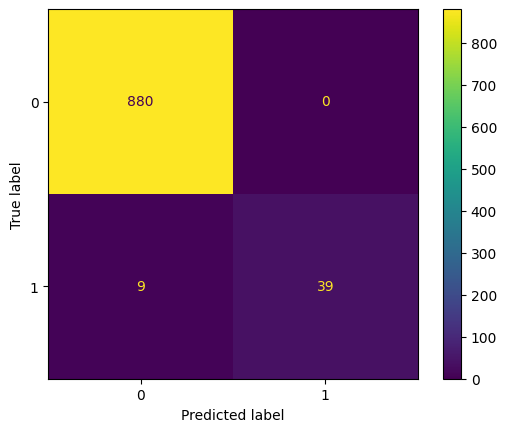

In [38]:
#Building the Random forest model based on the grid search
rfmodel_grid = RandomForestClassifier(max_depth=9, 
                                    max_features=None, 
                                    max_leaf_nodes=9, 
                                    n_estimators=50) 
rfmodel_grid.fit(X_train, y_train) 
y_pred_grid = rfmodel_grid.predict(X_test) 

#Evaluate training accuracy
print(" Training Accuracy using Randomforest Grid Search Model", rfmodel_grid.score(X_train,y_train))
#Evaluate test accuracy
print(" Test Accuracy using Randomforest Grid Search Model", rfmodel_grid.score(X_test,y_test))

#Print classification report
generate_classification_report( "Randomforest  Grid Search Best estimator",rfmodel_grid, y_pred_grid)

> Fine tuning the Randomforest classifier didnot provide improvement in the Recall score, but improved only the precision score.
>
> So, we are doing one more attempt by over-sampling the thyroid data. As the dataset is imbalanced, with more records of healthy patients. The model works well for the healthy patients. Now building a model on the oversampled dataset which resamples original dataset to provide a balance in the target 'Class' variable. 

 Training Accuracy using Best Randomforest Model on the oversampled dataset 0.9859615384615384
 Test Accuracy using Best Randomforest Model  on the oversampled dataset 0.978448275862069
Classification Report for Randomforest Best estimator on the oversampled dataset
----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       880
           1       0.71      0.98      0.82        48

    accuracy                           0.98       928
   macro avg       0.86      0.98      0.91       928
weighted avg       0.98      0.98      0.98       928

----------------------------------------------------------
***Roc Auc Score for the model *** 0.9787878787878788
----------------------------------------------------------
[[861  19]
 [  1  47]]
----------------------------------------------------------


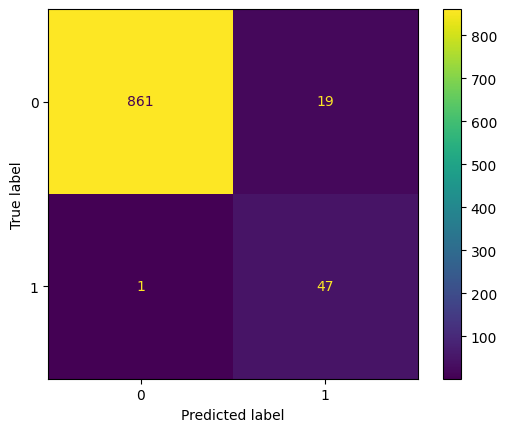

In [39]:
#Building the Random forest model in the oversampled data
rfmodel_grid_resampled = RandomForestClassifier(max_depth=9, 
                                    max_features=None, 
                                    max_leaf_nodes=9, 
                                    n_estimators=50) 
rfmodel_grid_resampled.fit(X_resampled, y_resampled) 
y_pred_grid = rfmodel_grid_resampled.predict(X_test) 

#Evaluate training accuracy
print(" Training Accuracy using Best Randomforest Model on the oversampled dataset", rfmodel_grid_resampled.score(X_resampled,y_resampled))
#Evaluate test accuracy
print(" Test Accuracy using Best Randomforest Model  on the oversampled dataset", rfmodel_grid_resampled.score(X_test,y_test))

#Print classification report
generate_classification_report( "Randomforest Best estimator on the oversampled dataset",rfmodel_grid_resampled, y_pred_grid)

> Using the oversampled dataset, the model performs well in the test dataset. The Recall score improved drastically to 0.98 and it is performing good in predicting the thyroid patients.
> So, this final model can be used to predict the thyroid patients.

##### Conclusions

Text(0, 0.5, 'True Positive Rate')

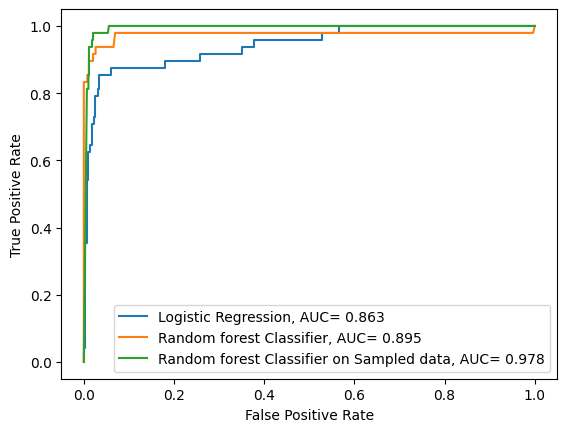

In [40]:
#Plotting the ROC curve for Logistic Regression, Random forest fined tuned model, Randomforest model fitted on oversampled data
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_logistic)
plt.plot(fpr,tpr,label="Logistic Regression, AUC= 0.863")


y_pred_rf = rfmodel_grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="Random forest Classifier, AUC= 0.895")

y_pred_rf_sampled = rfmodel_grid_resampled.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf_sampled)
plt.plot(fpr,tpr,label="Random forest Classifier on Sampled data, AUC= 0.978")


#add legend
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

  > **_Answer:_**  By comparing all the models which are created, the Recall and ROC-AUC of the Randomforest model which is trained on the over-sampled dataset performs better compared to Logistic Regression.
> 
>So, we are going to proceed with the Randomforest model which is trained on the over-sampled dataset (rfmodel_grid_resampled).
> 
> Collaborator model predicted all the records as healthy patients and did not correctly predict even 1 thyroid patient and hence Recall score is 0. But the Randomforest model on the over-sampled data correctly predicted almost all the thyroid patients except one thyroid patient who got predicted as healthy. But this has a trade-off that some of the healthy patients were incorrectly predicted as thyroid patients. But the goal is to predict most of the thyroid patients correctly, so we can use this Randomforest model which is trained on over-sampled data.